In [1]:
#organizing imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import cv2
import numpy as np
import matplotlib.pyplot as plt
import decomposeP

In [2]:
#projection matrix from correspondences

def ProjectionMatrixFromCorrespondences(xs, Xw):

    """Determine the projection matrix from multiple corresponding world and scene
    corner points on the calibration object"""
    A = np.empty((0, 12))

    for i in range(Xw.shape[0]):

        X = Xw[i, 0]
        Y = Xw[i, 1]
        Z = Xw[i, 2]

        x = xs[i, 0]
        y = xs[i, 1]


        new_row1 = np.array([ 0, 0, 0, 0, -X, -Y, -Z, -1, y*X, y*Y, y*Z, y ])
        new_row2 = np.array([ X, Y, Z, 1, 0, 0, 0, 0, -x*X, -x*Y, -x*Z, -x ])

        A = np.append(A, [new_row1], axis=0)
        A = np.append(A, [new_row2], axis=0)

    U, S, Vt = la.svd(A)

    V = Vt.T
    p = V[:, 11]
    P = p.reshape((3,4))

    return P

In [3]:
#Coorinates of the corners in the world (mm coordinate system)

#left view
XYZL = np.array([[0, 32, 0, 12*9.6],
                [1, 0, 5*32, 5*9.6],
                [2, 0, 3*32, 10*9.6],
                [3, 0, 2*32, 12*9.6],
                [4, 0, 16, 9.6],
                [5, 0, 32, 12*9.6],
                [6, 0, 4*32, 11*9.6],
                [7, 0, 4*32, 8*9.6],
                [8, 0, 16, 2*9.6],
                [9, 0, 16, 11*9.6],
                [10, 0, 16, 10*9.6],
                [11, 0, 5.5*32, 5*9.6],
                [12, 0, 2*32, 8*9.6],
                [13, 16, 0, 3*9.6],
                [14, 32, 0, 11*9.6],
                [15, 0, 2*32, 4*9.6],
                [16, 0, 3.5*32, 10*9.6],
                [17, 16, 0, 11*9.6],
                [18, 0, 0, 10*9.6],
                [19, 0, 2*32, 5*9.6],
                [20, 1.5*32, 0, 12*9.6],
                [21, 0, 6*32, 2*9.6],
                [22, 0, 1.5*32, 7*9.6],
                [23, 0, 2*32, 11*9.6],
                [24, 0, 4.5*32, 5*9.6],
                [25, 0, 16, 9*9.6],
                [26, 32, 0, 2*9.6],
                [27, 0, 5.5*32, 6*9.6],
                [28, 2*32, 0, 7*9.6],
                [29, 0, 5.5*32, 2*9.6],
                [30, 0, 0, 11*9.6],
                [31, 0, 5.5*32, 12*9.6],
                [32, 0, 5.5*32, 9.6],
                [33, 7*32, 0, 12*9.6],
                [34, 7*32, 0, 9.6],
                [35, 0, 0, 0]])

#right view
XYZR = np.array([[0, 0, 32, 10*9.6],
                [1, 32, 0, 12*9.6],
                [2, 0, 16, 2*9.6],
                [3, 0, 16, 3*9.6],
                [4, 16, 0, 5*9.6],
                [5, 0, 1.5*32, 8*9.6],
                [6, 0, 0, 10*9.6],
                [7, 0, 16, 12*9.6],
                [8, 1.5*32, 0, 12*9.6],
                [9, 16, 0, 12*9.6],
                [10, 0, 32, 9*9.6],
                [11, 0, 0.5*32, 11*9.6],
                [12, 0, 16, 9.6],
                [13, 2*32, 0, 11*9.6],
                [14,  0, 32, 8*9.6],
                [15, 0, 32, 11*9.6],
                [16, 0, 32, 12*9.6],
                [17, 0, 2*32, 5*9.6],
                [18, 0, 3.5*32, 11*9.6],
                [19, 0, 16, 4*9.6],
                [20, 0, 2.5*32, 8*9.6],
                [21, 0, 2*32, 4*9.6],
                [22, 32, 0, 11*9.6],
                [23, 0, 2.5*32, 4*9.6],
                [24, 0, 2.5*32, 5*9.6],
                [25, 0, 1.5*32, 7*9.6],
                [26, 2*32, 0, 12*9.6],
                [27, 2*32, 0, 9*9.6],
                [28, 0, 4.5*32, 9*9.6],
                [29, 0, 2.5*32, 6*9.6],
                [30, 0, 1.5*32, 9.6],
                [31, 0, 5.5*32, 12*9.6],
                [32, 0, 5.5*32, 9.6],
                [33, 7*32, 0, 12*9.6],
                [34, 7*32, 0, 9.6],
                [35, 0, 0, 0]])

C:\Users\ed\AppData\Local\Temp\ipykernel_17576\1765641346.py:8: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  cornersL = np.int0(cornersL)


[[ 2.29183904e-03 -2.87787589e-03 -3.25962100e-05  6.42872422e-01]
 [-3.82707703e-04 -2.73885852e-04 -3.63677084e-03  7.65955543e-01]
 [ 3.15352813e-07  1.99638750e-07 -6.30201335e-08  4.15356260e-04]]
camera matrix before scaling
[[ 3.65761206e-03 -7.31279197e-06  3.96961962e-04]
 [ 0.00000000e+00  3.66433637e-03  1.42196277e-04]
 [ 0.00000000e+00  0.00000000e+00  3.78516268e-07]]

camera matrix after scaling
KL
[[ 9.66302476e+03 -1.93196240e+01  1.04873158e+03]
 [ 0.00000000e+00  9.68078967e+03  3.75667544e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
RL
[[ 0.53590112 -0.84425017  0.00718624]
 [-0.13677116 -0.0952106  -0.98601653]
 [ 0.83312883  0.52742449 -0.16649254]]
C_tildeL
[-921.99745423 -514.7855414   346.40718409]


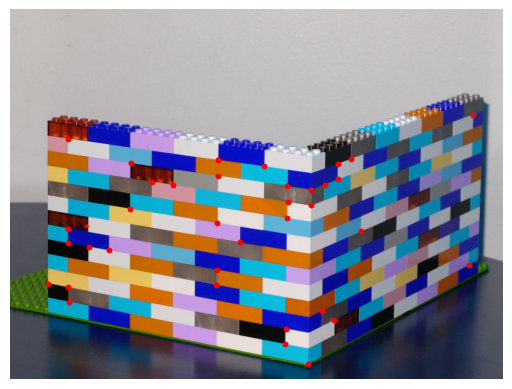

In [4]:
# Shi-Tomasi corner detection
# detect some corners on the calibration object
	
img = cv2.imread('lego1.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#feature detecotr
cornersL = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10)
cornersL = np.int0(cornersL)

# display indices of corners
index = []
j = -1
for i in cornersL:

	j+=1
	x, y = i.ravel()
	if y < 745:
		pass
	else:
		index.append(j), cv2.circle(img, (x, y), 10, (255, 0, 0), -1)
	    
cornersL = cornersL.reshape(100, 2)
cornersL = cornersL[index,:]

#delete some corners
cornersL = np.delete(cornersL, 15, axis=0)
cornersL = cornersL[:31, :]

#manually add in some corners on the extremes/corners of the object
#which were not detected using shi-tomasi
cornersL = np.append(cornersL, [[302, 672], [304, 1517], [2406, 546], [2383, 1329], [1549, 1840]], axis = 0)

plt.imshow(img, cmap = 'gray')
for l in range(cornersL[:, 0].shape[0]):

#     plt.text(cornersL[l, 0],cornersL[l, 1], '{}'.format(l), color ='red')
    plt.scatter(x=cornersL[l, 0], y=cornersL[l, 1], c='r', marker = '.', s=40)

plt.axis('off')
plt.savefig('right_corners.png')

#projection matrix of the left camera
PL = ProjectionMatrixFromCorrespondences(cornersL, XYZL[:, 1:])
print(PL)

KL, RL, cL = decomposeP.decomposeP(PL)
print('camera matrix before scaling')
print(KL)
KL = KL/KL[2, 2]

print('\ncamera matrix after scaling')
print('KL')

print(KL)

print('RL')
print(RL)
print('C_tildeL')
print(cL)

C:\Users\ed\AppData\Local\Temp\ipykernel_17576\3004612594.py:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  cornersR = np.int0(cornersR)


[[ 3.47860862e-03 -1.82996936e-03 -3.15610643e-05  4.87071464e-01]
 [-2.12328073e-04 -3.72096368e-04 -3.89766703e-03  8.73344331e-01]
 [ 2.22890473e-07  3.29401071e-07 -6.06563434e-08  4.92105775e-04]]
camera matrix before scaling
[[ 3.90671776e-03 -1.62610917e-06  4.33653797e-04]
 [ 0.00000000e+00  3.91765328e-03  1.65347879e-04]
 [ 0.00000000e+00  0.00000000e+00  4.02323776e-07]]

camera matrix after scaling
KR
[[ 9.71038252e+03 -4.04179237e+00  1.07787266e+03]
 [ 0.00000000e+00  9.73756342e+03  4.10982121e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
RR
[[ 0.82888888 -0.55935251  0.0082451 ]
 [-0.07758014 -0.12953528 -0.98853525]
 [ 0.55400771  0.81874622 -0.150765  ]]
C_tildeR
[-655.21000082 -985.43463334  353.83742296]


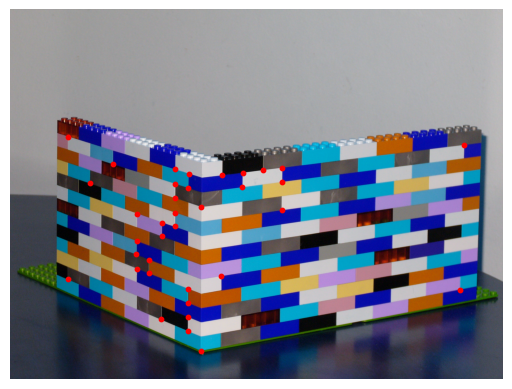

In [5]:
img = cv2.imread('lego2.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cornersR = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10)

cornersR = np.int0(cornersR)

index = []
j = -1
for i in cornersR:
	j+=1
	x, y = i.ravel()
	if y < 800:
		pass
	else:
		index.append(j), cv2.circle(img, (x, y), 10, (255, 0, 0), -1)

cornersR = cornersR.reshape(100, 2)
cornersR = cornersR[index,:]

cornersR = cornersR[:31, :]
cornersR = np.append(cornersR,[[300, 660], [299, 1402], [2360, 704], [2338, 1456], [990, 1772]], axis = 0)

im2 = cv2.imread('lego2.jpg')
plt.imshow(im2, cmap = 'gray')
for l in range(cornersR[:, 0].shape[0]):

    # plt.text(cornersR[l, 0],cornersR[l, 1], '{}'.format(l), color ='red')
    plt.scatter(x=cornersR[l, 0], y=cornersR[l, 1], c='r', marker = '.', s=40)

plt.axis('off')
plt.savefig('left_corners.png')


#projection matrix of the left camera
PR = ProjectionMatrixFromCorrespondences(cornersR, XYZR[:, 1:])
print(PR)

KR, RR, cR = decomposeP.decomposeP(PR)
print('camera matrix before scaling')
print(KR)
KR = KR/KR[2, 2]

print('\ncamera matrix after scaling')
print('KR')

print(KR)

print('RR')
print(RR)
print('C_tildeR')
print(cR)

In [6]:
#determining the baseline and stereo angle between the cameras

baseline = np.linalg.norm(cL-cR)
print('baseline')
print(baseline)
stereo_angle = (180/np.pi)*np.arccos(np.dot(RR[2, :], RL[2, :])/(np.linalg.norm(RR[2, :]))*np.linalg.norm(RL[2, :]))
print('stereo angle')
print(stereo_angle)

baseline
541.0557471190439
stereo angle
23.293992713422085


In [7]:
#plotting the cameras and the world points
cxL = RL.T@np.array([1, 0, 0]) + cL
cyL = RL.T@np.array([0, 1, 0]) + cL
czL = RL.T@np.array([0, 0, 1]) + cL

cxR = RR.T@np.array([1, 0, 0]) + cR
cyR = RR.T@np.array([0, 1, 0]) + cR
czR = RR.T@np.array([0, 0, 1]) + cR

In [8]:
#column vectors of the projection matrix

#projection matrix column vectors right image
pR1 = PR[:, 0]
pR2 = PR[:, 1]
pR3 = PR[:, 2]
pR4 = PR[:, 3]

#projection matrix column vectors left image
pL1 = PL[:, 0]
pL2 = PL[:, 1]
pL3 = PL[:, 2]
pL4 = PL[:, 3]

print('Camera matrix column vectors')

pr4 = pR4/pR4[2]

pr1 = pR1/pR1[2]
pr2 = pR2/pR2[2]
pr3 = pR3/pR3[2]

print('right')
print(pr1)
print(pr2)
print(pr3)
print(pr4)
# print(pL1/pL1[2])
# print(pR1/PR[2,3])

print('\nleft')
pl1 = pL1/pL1[2]
pl2 = pL2/pL2[2]
pl3 = pL3/pL3[2]
pl4 = pL4/pL4[2]
print(pl1)
print(pl2)
print(pl3)
print(pl4)

Camera matrix column vectors
right
[ 1.56068072e+04 -9.52611705e+02  1.00000000e+00]
[-5.55544446e+03 -1.12961493e+03  1.00000000e+00]
[5.20325864e+02 6.42581931e+04 1.00000000e+00]
[9.89769860e+02 1.77470856e+03 1.00000000e+00]

left
[ 7.26753952e+03 -1.21358582e+03  1.00000000e+00]
[-1.44154173e+04 -1.37190727e+03  1.00000000e+00]
[5.17234862e+02 5.77080790e+04 1.00000000e+00]
[1.54776148e+03 1.84409293e+03 1.00000000e+00]


Plotting the image of the world coordinate system


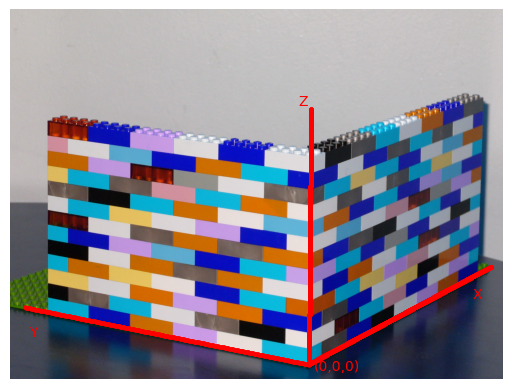

In [9]:
# def FitCurveToCameraColumns():
print('Use the projection matrices to plot the world coordinate system basis vectors')
print('Currently the z axis has an offset from the true Z coordinate system, not sure why this is happening. Mannually translated it :)')


def AxesFromColumnVectors(pi, p4, qx):

    x = np.arange(p4[0], qx)

    Y = np.array([ [pi[1]],
                   [p4[1]] ])

    X = np.array([ [pi[0], 1],
                   [p4[0], 1] ])

    #find the coefficients
    C = np.linalg.solve(X.T@X, X.T@Y)

    y = C[0]*x + C[1]

    return x, y

def AxesFromColumnVectorsY(pi, p4, qy):

    y = np.arange(p4[0], qy)

    Y = np.array([ [pi[0]],
                   [p4[0]] ])

    X = np.array([ [pi[1], 1],
                   [p4[1], 1] ])

    #find the coefficients
    C = np.linalg.solve(X.T@X, X.T@Y)

    x = C[0]*y + C[1]

    return y, x

def AxesFromColumnVectorsZ(pi, p4, qy):

    y = np.arange(p4[0], qy)

    Y = np.array([ [pi[0]],
                   [p4[0]] ])

    X = np.array([ [-pi[1], 1],
                   [-p4[1], 1] ])

    #find the coefficients
    C = np.linalg.solve(X.T@X, X.T@Y)

    x = C[0]*y + C[1]

    return y, x

x1l, y1l = AxesFromColumnVectors(pl1, pl4, 2500)
x2l, y2l = AxesFromColumnVectorsY(pl2, pl4, 1845)
y3l, x3l = AxesFromColumnVectorsZ(pl3, pl3, 1820)

img = cv2.imread('lego1.jpg')
plt.imshow(img, cmap = 'gray')

#origin
plt.text(pl4[0] + 30, pl4[1] + 30, '(0,0,0)', color ='red')
plt.text(2400, 1500, 'X', color ='red')
plt.text(100, 1700, 'Y', color ='red')
plt.text(1500, 500, 'Z', color ='red')

#X
plt.scatter(x=x1l, y=y1l, c='r', marker = '.', s=20)
plt.scatter(x=y2l, y=x2l, c='r', marker = '.', s=20)
plt.scatter(x=x3l+1500, y=y3l , c='r', marker = '.', s=20)
#plt.scatter(x=x3l, y=y3l , c='r', marker = '.', s=20)
plt.axis('off')
plt.savefig('camera_CS_L.png')
plt.show()

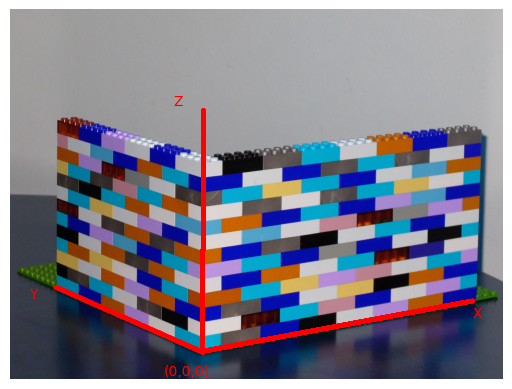

In [10]:
x1r, y1r = AxesFromColumnVectors(pr1, pr4, 2400)
x2r, y2r = AxesFromColumnVectorsY(pr2, pr4, 1780)
y3r, x3r = AxesFromColumnVectorsZ(pr3, pr3, 1780)

img = cv2.imread('lego2.jpg')
plt.imshow(img, cmap = 'gray')

#origin
plt.text(800, 1900, '(0,0,0)', color ='red')
plt.text(2400, 1600, 'X', color ='red')
plt.text(100, 1500, 'Y', color ='red')
plt.text(850, 500, 'Z', color ='red')

#X
plt.scatter(x=x1r, y=y1r, c='r', marker = '.', s=20)
plt.scatter(x=y2r[450:], y=x2r[450:], c='r', marker = '.', s=20)
plt.scatter(x=x3r+850, y=y3r , c='r', marker = '.', s=20)
#plt.scatter(x=x3l, y=y3l , c='r', marker = '.', s=20)
plt.axis('off')
plt.savefig('camera_CS_R.png')
plt.show()

In [11]:
print(pl4[0])

1547.7614841255752


right image


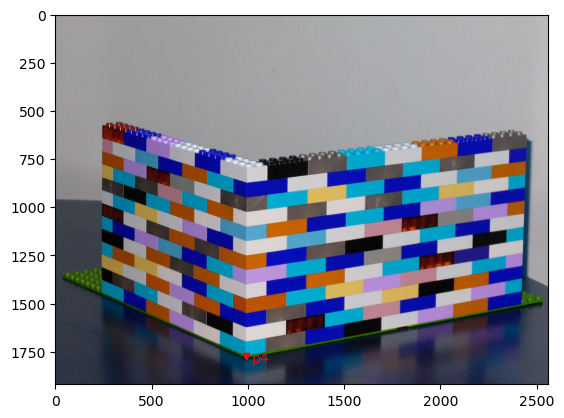

In [12]:
print('right image')

im2 = cv2.imread('lego2.jpg')
plt.imshow(im2, cmap = 'gray')


plt.text(pr4[0] + 30, pr4[1] + 30, 'p4', color ='red')
plt.scatter(x=pr4[0], y=pr4[1], c='r', marker = 'v', s=20)

# plt.text(pr3[0], pr3[1], 'p3', color ='red')
# plt.scatter(x=pr3[0], y=pr3[1], c='r', marker = '.', s=20)

left image


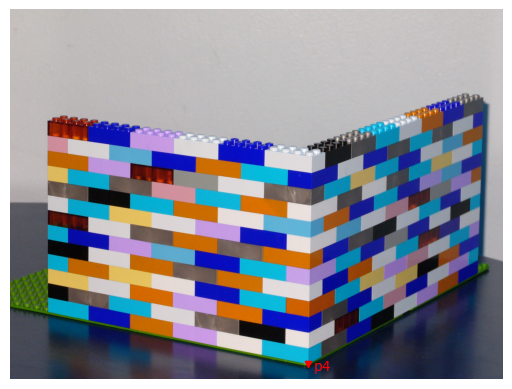

In [13]:
print('left image')

im2 = cv2.imread('lego1.jpg')
plt.imshow(im2, cmap = 'gray')


plt.text(pl4[0]+30, pl4[1]+30, 'p4', color ='red')
plt.scatter(x=pl4[0], y=pl4[1], c='red', marker = 'v', s=20)
plt.axis('off')
plt.savefig('lCS.png')
plt.show()

# plt.text(pr3[0], pr3[1], 'p3', color ='red')
# plt.scatter(x=pr3[0], y=pr3[1], c='r', marker = '.', s=20)

In [14]:
##calculation of epipoles
C_L = np.append(cL, 1)
C_R = np.append(cR, 1)

print(C_L)


#left epipole
eL = PL@C_R
eLH = eL/eL[2]
#print(eL)

#right epipole
eR = PR@C_L
eRH = eR/eR[2]
#eR = PR@np.append(cL, 1)
#print(eR)

#de-homoginised
print('\nL:',eLH)
print('\nR:',eRH)


[-921.99745423 -514.7855414   346.40718409    1.        ]

L: [-1.90917330e+05  2.13252189e+01  1.00000000e+00]

R: [-1.86327190e+04 -9.32316569e+02  1.00000000e+00]


In [15]:
#fundamental matrix

eRx = np.array([[0, -eR[2], eR[1]],
                [eR[2], 0, -eR[0]],
                [-eR[1], eR[0], 0]])

F = eRx@PR@np.linalg.pinv(PL)

print('Fundamental matrix')
print(F)

Fundamental matrix
[[-6.30774504e-07 -1.02345272e-04 -1.18243249e-01]
 [ 1.16746436e-05 -8.05837096e-06  2.22906364e+00]
 [-8.68580350e-04 -1.91448364e+00 -1.25000259e+02]]
